# Dataset Black Friday 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\DATA MINING\data.csv", sep=",")
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
data.shape

(550068, 12)

## Statistika deskriptif

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
from scipy.stats import mode
print([data['Gender'].mode()],
      [data['Age'].mode()],
      [data['City_Category'].mode()],
      [data['Stay_In_Current_City_Years'].mode()],
      [data['Marital_Status'].mode()])

[0    M
dtype: object] [0    26-35
dtype: object] [0    B
dtype: object] [0    1
dtype: object] [0    0
dtype: int64]


In [6]:
pd.DataFrame(data.count().sort_values(), columns=['Jumlah Data'])

,Jumlah Data
Product_Category_3,166821
Product_Category_2,376430
User_ID,550068
Product_ID,550068
Gender,550068
Age,550068
Occupation,550068
City_Category,550068
Stay_In_Current_City_Years,550068
Marital_Status,550068


## Deteksi Missing value

In [7]:
d = pd.DataFrame(np.sum(data.isnull()), columns=['Jumlah Missing Value'])
d['Variabel']=list(data)
d

,Jumlah Missing Value,Variabel
User_ID,0,User_ID
Product_ID,0,Product_ID
Gender,0,Gender
Age,0,Age
Occupation,0,Occupation
City_Category,0,City_Category
Stay_In_Current_City_Years,0,Stay_In_Current_City_Years
Marital_Status,0,Marital_Status
Product_Category_1,0,Product_Category_1
Product_Category_2,173638,Product_Category_2


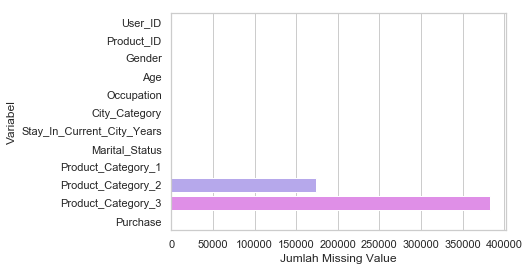

In [8]:
sns.set(style="whitegrid")
sns.barplot(x="Jumlah Missing Value", y="Variabel", data=d)
plt.show()

## Imputasi Missing Value

In [9]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mean())
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mean())
np.sum(data.isnull())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Deteksi Outlier

In [10]:
from scipy import stats
data2=data.drop(['User_ID','Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status'],1)
z = np.abs(stats.zscore(data2._get_numeric_data()))
print(z)
data1=data[(z<3).all(axis=1)]
print(data1.shape)

[[2.94863556e-01 6.10808714e-01 4.22153275e-16 7.81906541e-16
  1.77972902e-01]
 [2.94863556e-01 1.11891197e+00 9.13134028e-01 5.86205048e-01
  1.18175580e+00]
 [2.94863556e-01 1.67565594e+00 4.22153275e-16 7.81906541e-16
  1.56119326e+00]
 ...
 [1.06142262e+00 3.70806897e+00 4.22153275e-16 7.81906541e-16
  1.81701338e+00]
 [1.08494277e+00 3.70806897e+00 4.22153275e-16 7.81906541e-16
  1.77162273e+00]
 [1.23825458e+00 3.70806897e+00 4.22153275e-16 7.81906541e-16
  1.74673750e+00]]
(523644, 12)


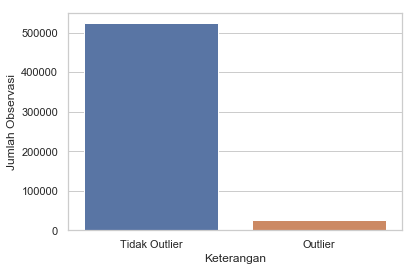

In [11]:
sns.set(style="whitegrid")
c = pd.DataFrame([])
c['Keterangan'] = ["Tidak Outlier","Outlier"]
c['Jumlah Observasi'] = [523644,26424]
sns.barplot(x="Keterangan", y="Jumlah Observasi", data=c)
plt.show()

## Transformasi
### Normalisasi pada Variabel Numerik

In [12]:
from sklearn.preprocessing import normalize

x=data2
xnorm=normalize(x,norm='l2')
xnorm=pd.DataFrame(xnorm, columns=['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase'])
xnorm.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.001195,0.000358,0.001176,0.001514,0.999997
1,0.000658,0.000066,0.000395,0.000921,0.999999
2,0.007031,0.008438,0.006921,0.008908,0.999876
3,0.009458,0.011350,0.013241,0.011982,0.999731
4,0.002008,0.001004,0.001235,0.001590,0.999995


### Transformasi pada Variabel Kategorik

In [13]:
data['Gender'].replace({'F':0, 'M':1}, inplace=True)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
aa=le.fit(data.iloc[0:,3])
a=le.transform(data.iloc[0:,3])
bb=le.fit(data.iloc[0:,5])
b=le.transform(data.iloc[0:,5])
cc=le.fit(data.iloc[0:,6])
c=le.transform(data.iloc[0:,6])

data['Age']=a
data['City_Category']=b
data['Stay_In_Current_City_Years']=c
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969


In [14]:
data.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000
